#Posttest 3
##Nama  : Sahriah
##NIM   : 2109106087
##Kelas : C1'22

inport library yang akan digunakan dalam pengerjaan posttest

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

heart = pd.read_csv('https://raw.githubusercontent.com/sahriahs/Praktikum_KB/refs/heads/master/Posttest_2_KB/heart_posttest2.csv')

melihat informasi dataframe

In [30]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


menampilkan dataset (5 pertama dan terakhir)

In [31]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


menampilkan nilai jumlah, rata-rata, standar deviasi, dan quartil

In [32]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##1. Data Cleaning Handling missing value (jika ada) Handling duplicate value (jika ada) Handling outlier (jika ada)

periksa missing Value Pada Dataset

In [33]:
heart.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Periksa Nilai Duplikat Pada Dataset

In [34]:
heart.duplicated().sum()

0

Jumlah outlier berdasarkan Cholesterol: 183
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
28    53   F           ATA        113          468          0     Normal   
30    53   M           NAP        145          518          0     Normal   
69    44   M           ASY        150          412          0     Normal   
76    32   M           ASY        118          529          0     Normal   
103   40   M           ASY        120          466          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   
616   67   F           NAP        115          564          0        LVH   
667   65   F           NAP        140          417          1        LVH   
796   56   F           ASY        134          409          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


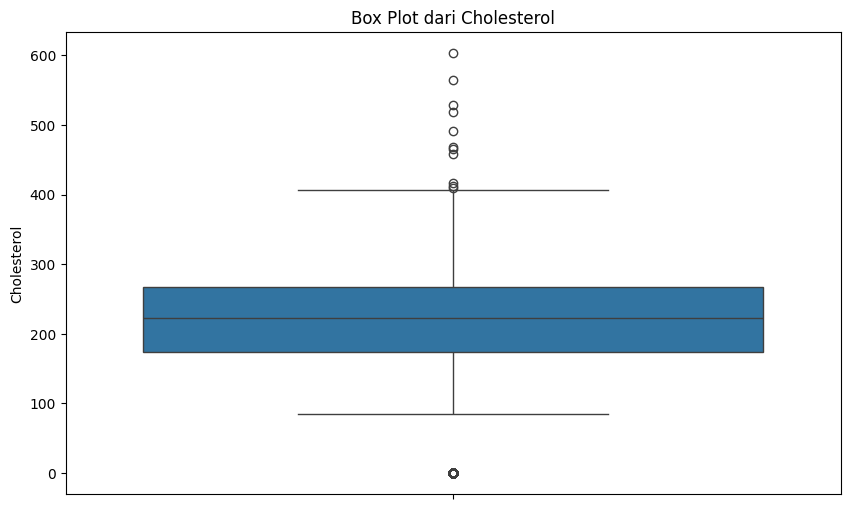

In [35]:
# Metode IQR untuk mendeteksi outlier
Q1 = heart['Cholesterol'].quantile(0.25)
Q3 = heart['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = heart[(heart['Cholesterol'] < lower_bound) | (heart['Cholesterol'] > upper_bound)]

print(f"Jumlah outlier berdasarkan Cholesterol: {len(outliers)}")
print(outliers)

# Membuat Box Plot untuk visualisasi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart, y='Cholesterol')
plt.title('Box Plot dari Cholesterol')
plt.ylabel('Cholesterol')
plt.show()

##4. Feature engineering (minimal 1 feature baru)

menambahkan feature baru yaitu pada atribut 'Cholesterol'

In [36]:
bins = [0, 120, 200, 239, 800]
# nama kategori
labels = ['Rendah', 'Normal', 'Sedang', 'Tinggi']
heart['Cholesterol_Group'] = pd.cut(heart['Cholesterol'], bins=bins, labels=labels)
# Lihat hasilnya
heart[['Cholesterol', 'Cholesterol_Group']].head()

,Cholesterol,Cholesterol_Group
0,289,Tinggi
1,180,Normal
2,283,Tinggi
3,214,Sedang
4,195,Normal


menghapus atribut yang baru ditambahkan karena tidak dibutuhkan

In [37]:
heart = heart.drop(['Cholesterol_Group'], axis=1)

In [38]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


##2. Normalisasi/standarisasi kolom numerik

In [39]:
num_list = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
min_max_scaler = MinMaxScaler()
for i in num_list:
  heart[i] = min_max_scaler.fit_transform(heart[[i]])
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.70,0.479270,0,Normal,0.788732,N,0.295455,Up,0
1,0.428571,F,NAP,0.80,0.298507,0,Normal,0.676056,N,0.409091,Flat,1
2,0.183673,M,ATA,0.65,0.469320,0,ST,0.267606,N,0.295455,Up,0
3,0.408163,F,ASY,0.69,0.354892,0,Normal,0.338028,Y,0.465909,Flat,1
4,0.530612,M,NAP,0.75,0.323383,0,Normal,0.436620,N,0.295455,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,M,TA,0.55,0.437811,0,Normal,0.507042,N,0.431818,Flat,1
914,0.816327,M,ASY,0.72,0.320066,1,Normal,0.570423,N,0.681818,Flat,1
915,0.591837,M,ASY,0.65,0.217247,0,Normal,0.387324,Y,0.431818,Flat,1
916,0.591837,F,ATA,0.65,0.391376,0,LVH,0.802817,N,0.295455,Flat,1


##3. Encoding kolom kategorikal

In [40]:
cat_list = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoder = LabelEncoder()
for i in cat_list:
  heart[i] = label_encoder.fit_transform(heart[[i]])
heart

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,1,0.507042,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,1,0.570423,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,1,0.387324,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,0,0.802817,0,0.295455,1,1


##5. Splitting data ke dalam data training & data testing

membagi data menjadi train: test = 8 : 2

In [41]:
X = heart.drop('HeartDisease', axis=1)
y = heart['HeartDisease']

X_train, X_test, y_train, y_test =  train_test_split(
    X, y, test_size=0.2, random_state=42
)

menyimpan file dataframe ke file csv

In [42]:
heart.to_csv('heart_posttest3.csv', index=False)